In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import norm
from scipy.stats import multivariate_normal

In [4]:
def generate_uniform(n, min_value, max_value):
    #np.random.seed(3)
    s = np.random.rand(n)
    s = s*(max_value - min_value) + min_value
    return s

In [5]:
def generate_normal(n, mean, sig, dim=1):
    #np.random.seed(3)
    min_value = mean - 3*sig
    max_value = mean + 3*sig
    normal = []
    while True:
        y = np.random.rand()
        x = np.random.rand(dim)
        x = x*(max_value - min_value) + min_value
        px = multivariate_normal.pdf(x, mean, sig)
        if px >= y:
            normal.append(x)
        if len(normal)==n:
            break
    return np.array(normal)

In [98]:
def generate_non_uniform(n, m, scale_value, bins=6):
    p_values = np.random.exponential(scale=scale_value, size=m)
    counts, binlist = np.histogram(p_values, bins)
    plt.hist(p_values)
    plt.show()
    final = []
    for i in range(len(counts)):
        a = np.full(counts[i], i)
        final.extend(a)
    bindict = {}
    for i in range(1, bins+1):
        data = np.array([])
        data = p_values[np.where(p_values >= binlist[i-1])]
        data = data[np.where(data <= binlist[i])]
        bindict.update({i-1 : data})
    size = m
    result = set()
    while True:
        bin_select = np.random.rand()
        bin_select = round(bin_select*(bins-1))
        y = np.random.rand()
        data = bindict[bin_select]
        max_value = len(data)
        y = int(y*max_value)
        try:
            result.add(data[y])
            bindict.update( { bin_select : np.delete(data, y)})
        except Exception:
            continue
        x = len(result)
        if x == n:
            break
    return result     

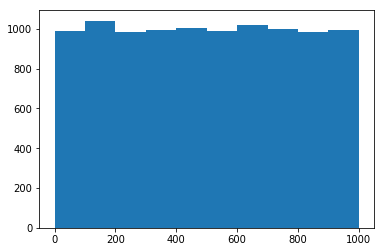

In [7]:
data = generate_uniform(10000,0,1000)
plt.hist(data)
plt.show()

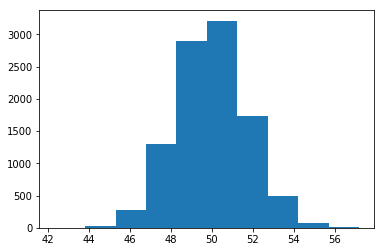

In [5]:
data = generate_normal(10000, 50, 3)
plt.hist(data)
plt.show()

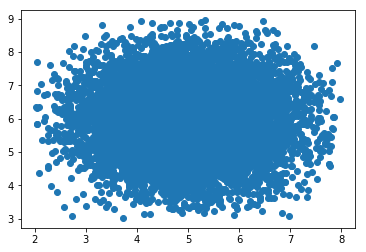

In [11]:
mean_value = np.array([5,6])
sigma_value = np.array([1,1])
x = generate_normal(10000, mean_value, sigma_value, 2)
plt.plot(x[:,0], x[:,1], 'o')
plt.show()

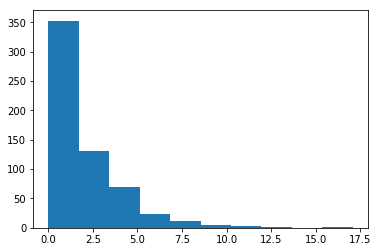

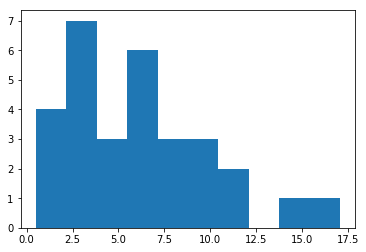

In [99]:
result = generate_non_uniform(30,600,2)
plt.hist(list(result))
plt.show()